In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy

# Random numbers

Numpy let you generate random numbers. Using the random number generators given as examples, implement the functions below.

In [2]:
np.random.normal()

1.7966039482468446

In [3]:
mu = 10
variance = 2
np.random.normal(mu, variance, size=(3, ))

array([ 7.01817126,  9.935303  , 12.67430842])

In [4]:
p = 0.8
n = 10
np.random.binomial(n, p), np.random.binomial(1, p) # Binomial(n,p), Bernoulli(p)

(8, 1)

In [5]:
np.random.binomial(1, p, size=(5, ))

array([1, 1, 0, 0, 1])

In [6]:
np.random.c(np.array([1, 1]), np.array([[1, 1], [1, 1]]), size=3)

array([[2.60939421, 2.60939421],
       [1.25249473, 1.25249472],
       [0.04802247, 0.04802247]])

In [7]:
from scipy import linalg

def generate_wishart(n, covariance, k=1):
    """
    Return k Wishart matrices with degrees of freedom n
    and given covariance.
    
    Parameters
    ----------
    n: int
        degrees of freedom
    covariance: np array of shape (p, p)
        covariance matrix
    k: int or None (optional)
        number of wishart matrices to return
    
    Return
    ------
    W: np array of shape (k, p, p)
        k Wishart matrices
    """
    wisharts = []
    for _ in range(k):
        Y = np.random.multivariate_normal(np.zeros(covariance.shape[0]), covariance, size=n)
        wisharts.append(np.matmul(Y.T, Y))
    return np.array(wisharts)
    
generate_wishart(5, np.eye(3))

array([[[6.49393329, 0.38411313, 3.57941562],
        [0.38411313, 4.63576442, 0.96173015],
        [3.57941562, 0.96173015, 5.22146399]]])

In [8]:
np.random.choice(6) + 1 # roll a die

2

In [9]:
1 + np.random.choice(6, p =[1/6, 1/6, 1/6, 1/6, 1/6, 1/6], size=(10, ))  # roll a die 10 times

array([5, 2, 6, 4, 4, 3, 4, 5, 2, 1])

In [10]:
# roll a biased die 10 times
1 + np.random.choice(6, p =[1/10, 1/10, 1/10, 1/10, 1/10, 1/2], size=(10, )) 

array([2, 6, 6, 6, 4, 5, 2, 6, 2, 5])

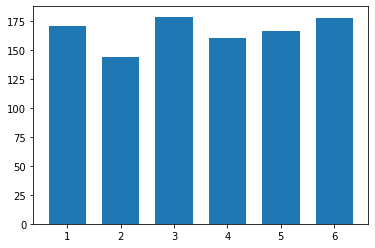

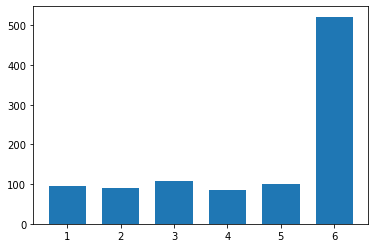

In [11]:
def biased_die_histogram(p, k):
    """
    Draw a biased die with probabilities p, k times, and plot the resulting histograms.
    There should be six bars.
    
    Parameters
    ----------
    p : np array of shape (6,)
        The probabilities associated with each outcome of the dice.
    k: int
        Number of rolls
    """
    hist = plt.hist(1+np.random.choice(6, p=p, size=k), bins=np.arange(0.5, 7, 1), align='mid', rwidth=0.7)
    plt.show()

biased_die_histogram([1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 1000)
biased_die_histogram([1/10, 1/10, 1/10, 1/10, 1/10, 1/2], 1000)

# SVD, Pseudo-Inverse in numpy

Generate a random matrix A of size (3, 6) with iid N(0,1) entries, and verify that the singular values squared are the eigenvalues of the matrix $A^TA$.

Verify that the pseudo-inverse computed by ``np.linalg.pinv`` is the same as the pseudo-inverse computed from its definition using the SVD.

In [12]:
A = np.random.normal(0, 1, size=(3,6))

In [62]:
def test_singular_values_eigenvalues(X, threshold=1e-4):
    """Test that the square of the singular values of X gives the eigenvalue of X^T.dot(X)
    """
    singvals = np.linalg.svd(X)[1]
    print("singular values squared :\n", singvals*singvals)
    eigvals = np.linalg.eigvalsh(np.matmul(X.T, X))
    eigvals = np.flip(eigvals[np.abs(eigvals)>threshold])
    print("eigen values of transpose(X).X :\n", eigvals)
    if np.allclose(singvals*singvals, eigvals):
        print("OK\n")

test_singular_values_eigenvalues(A)

def test_pinv(X):
    """Test that computing the pseudo inverse with pinv or via svd gives the same result
    """
    pinv_X = np.linalg.pinv(X)
    print("pseudo inverse of X computed with np.linalg.pinv : ", pinv_X)
    U, S, Vt = np.linalg.svd(X)
    S_inv = np.zeros((Vt.shape[0], U.shape[0]))
    for i, s in enumerate(S):
        if s!=0:
            S_inv[i, i] = 1/s
        else :
            S_inv[i, i] = 0
    svdinv_X = Vt.T @ S_inv @ U.T
    print("pseudo inverse of X computed using the SVD : ", svdinv_X)
    if np.allclose(pinv_X, svdinv_X):
        print("OK\n")

test_pinv(A)

singular values squared :
 [12.03406184  2.72447589  1.34309543]
eigen values of transpose(X).X :
 [12.03406184  2.72447589  1.34309543]
OK

pseudo inverse of X computed with np.linalg.pinv :  [[-0.48903661 -0.24705961  0.06963524]
 [-0.07539557 -0.03538733  0.04189073]
 [-0.54719526  0.32393759 -0.1739225 ]
 [ 0.3187661   0.18934053  0.02638695]
 [-0.01467961 -0.19982841  0.07261524]
 [-0.20017957  0.15347012 -0.44625483]]
pseudo inverse of X computed using the SVD :  [[-0.48903661 -0.24705961  0.06963524]
 [-0.07539557 -0.03538733  0.04189073]
 [-0.54719526  0.32393759 -0.1739225 ]
 [ 0.3187661   0.18934053  0.02638695]
 [-0.01467961 -0.19982841  0.07261524]
 [-0.20017957  0.15347012 -0.44625483]]
OK



# Boxplots

Using matplotlib, for each $\theta = 1,2,...20$, generate 100 independent copies of a random variable with $N(\theta, \theta^{-1})$ distribution. Plot the generated random variables with boxplots, one boxplot for each value of $\theta$ and the x-axis representing $\theta$.

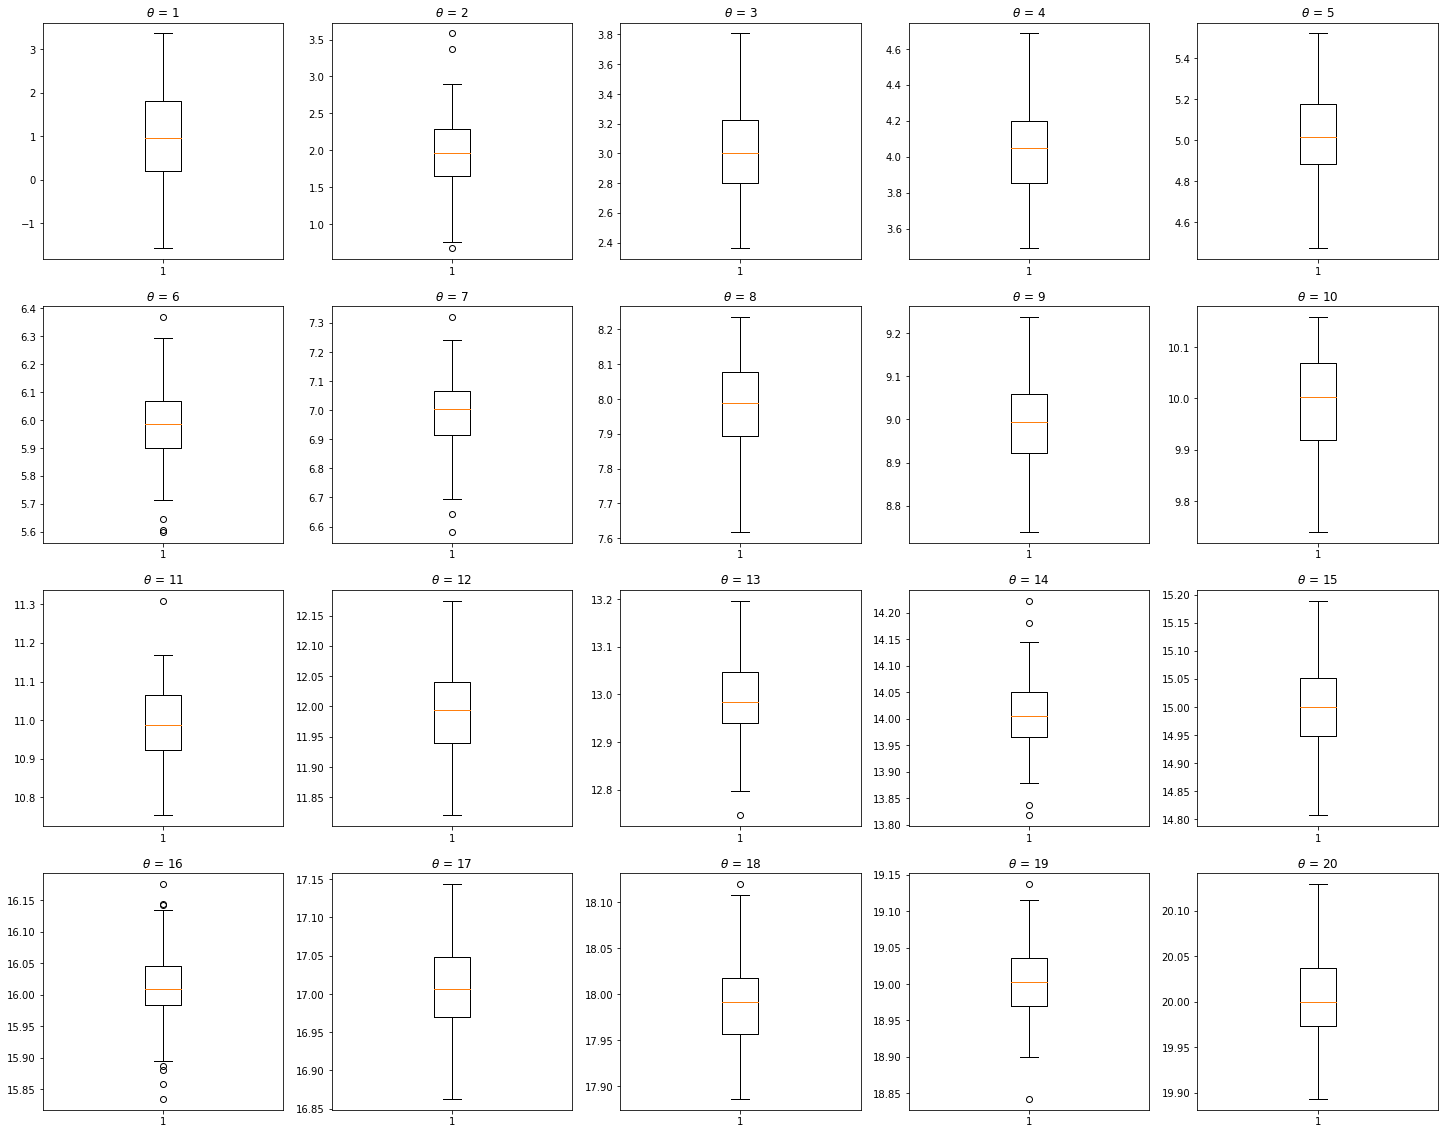

In [43]:
def plot_boxplot_normal_increasing_mean_and_variance():
    """Using matplotlib, for each theta = 1,2,...,20, 
    generate 100 independent copies of a random variable 
    with N(theta, theta^{-1}) distribution. 
    Plot the generated random variables with boxplots, 
    one boxplot for each value of theta and 
    the x-axis representing theta.
    """
    fig, axes = plt.subplots(4, 5, figsize=(25, 20))
    for theta in range(1, 21):
        data = np.random.normal(theta, 1/theta, 100)
        ax = axes[(theta-1)//5, (theta-1)%5]
        ax.boxplot(data)
        ax.set_title(rf"$\theta$ = {theta}")
    plt.plot()
        
        
plot_boxplot_normal_increasing_mean_and_variance()

# Quantile quantile plots

In order to check visually that a collection of random variables follow a certain distribution, quantile quantile plots are convenient.

In [ ]:
n = 10
X = np.random.randint(1000, size=n) # generate n numbers
X_sort = np.sort(X) # sort them
scores  = np.arange(1, n + 1) / (n+1) # their corresponding scores (many other methods are possible)

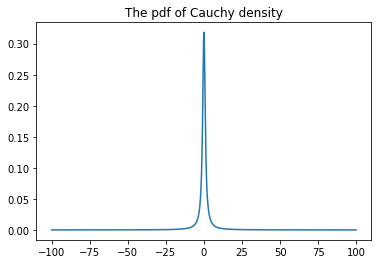

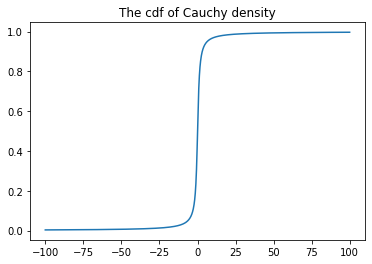

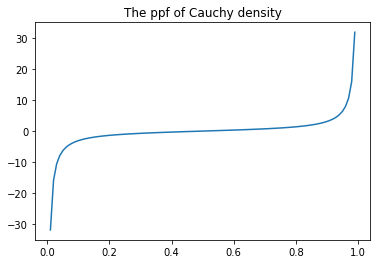

20%, 50% and 60% quantiles: [-1.37638192  0.          0.3249197 ]


In [ ]:
# Getting theoretical quantities on distributions
cauchy = scipy.stats.cauchy # many others are available
# the probability density function
X = np.arange(-100, 100, 0.1)
plt.figure()
plt.title("The pdf of Cauchy density")
plt.plot(X, cauchy.pdf(X))
plt.show()
# the cumulative distribution function
X = np.arange(-100, 100, 0.1)
plt.figure()
plt.title("The cdf of Cauchy density")
plt.plot(X, cauchy.cdf(X))
plt.show()
# the percent point function (inverse of cdf)
X = np.arange(0, 1, 0.01)
plt.figure()
plt.title("The ppf of Cauchy density")
plt.plot(X, cauchy.ppf(X))
plt.show()
# Theoretical 20%, 50% and 60% quantiles of cauchy distribution
quantiles = cauchy.ppf((0.2, 0.5, 0.6))
print("20%, 50% and 60% quantiles:", quantiles)

1. Generate 100 independent copies of N(1,3) random variables and plot the QQ-plot
against the theoretical quantiles of the N(0,1), N(5, 3) and N(1,3) distribution. Superpose on the plot the line y=x.

2. Generate 100 independent copies of chi-square random variables with 5 degrees of freedom,
and compare those aginst the theoretical quantiles of the N(5,1) distribution, the $\chi^2_4$ distribution, the $\chi^2_5$ distribution, the $\chi^2_6$ distribution.Superpose on the plot the line y=x.

In [ ]:
def qqplot(data, distribution):
    """
    Generate a qqplot using the quantiles of the data and the theoretical data of the distribution.
    Superpose on the plot the line y=x.
    
    Parameters
    ----------
    data: np array of shape (100,)
        Empirical data
    
    distribution: distribution from scipy.stats
        Theoretical distribution to compare to
    """
    raise NotImplementedError
    
def test_qqplot_sm():
    """
    Test the plot is the same as in sm.qqplot
    """
    X = np.random.normal(0, 1, size=100)
    qqplot(X, scipy.stats.norm)
    sm.qqplot(X, line='45')
    
test_qqplot_sm()

NotImplementedError: 

In [ ]:
raise NotImplementedError
# Answer 1.

NotImplementedError: 

In [ ]:
# Answer 2.
raise NotImplementedError

NotImplementedError: 

# Generate a simple regression model

Given the sample size n and dimension p, generate a dataset (y, X) where y has size n and X has size n times p,
such that
$y = X \beta^* + \beta_0^* + \epsilon$ where $\epsilon$ has iid $N(0,\sigma^2)$ entries, $X$ has iid $N(0,1)$ entries, and $\beta^*\in R^p$ has norm equal to the signal strength parameter, and $\beta_0^*$ is the intercept.

In [106]:
def linear_regression(X, beta_true, sigma):
    """
    Applies the linear regression model
    
    Parameters
    -----------
    
    X: np array of shape (n, p)
    input features

    beta_true: np array of shape (p)
    true coefficients
    
    sigma: float
    noise standard deviation 

    Return
    ------
    y: np array of shape (n,)
    responses generated accroding to the linear regression model
    y= X beta_true + eps
    """
    n, p = X.shape
    epsilon = np.random.normal(0, sigma, n)
    return X@beta_true + epsilon

def generate_dataset(n, p, sigma=0.7, signal_strength=2):
    """
    Generate a data set (with intercept = 0)
    Take beta_star uniformly in the sphere of length: signal_strength
    Parameters
    ----------
    n: int
        number of samples
    p: int
        dimension
    sigma: float
        noise standard deviation
    signal_strength: float
        norm of the true parameter b_true
    
    Return
    X: np array of shape (n, p)
        Features
    y: np array of shape (n,)
        Target
    beta_true: np array of shape (p,)
    """
    X = np.random.normal(0, 1, (n, p))
    beta_true = np.random.uniform(size=p)
    beta_true *= signal_strength/np.linalg.norm(beta_true)
    y = linear_regression(X, beta_true, sigma)
    return X, y, beta_true

def test_nointercept():
    """
    Check that X.dot(b_true) = y when the noise is 0
    """
    X, y, b_true = generate_dataset(100, 10, sigma=0, signal_strength=1)
    if np.testing.assert_allclose(X.dot(b_true), y) is None:
        print("OK")

def generate_dataset_with_intercept(n, p, sigma=0.7, signal_strength=2):
    """
    Generate a data set, same as before, but here the returned array X should have
    p+1 columns, and the first column contains only 1,1,...,1 to accout for
    possible intercept.
    Parameters
    ----------
    n: int
        number of samples
    p: int
        dimension
    sigma: float
        noise standard deviation
    signal_strength: float
        norm of the true parameter b_true
    
    Return
    X: np array of shape (n, p + 1)
        Features, last column contains only ones
    y: np array of shape (n,)
        Target
    b_true: np array of shape (p+1,)
        true coefficients (last one is the intercept)
    """
    X = np.hstack((np.random.normal(0, 1, (n, p)), np.ones((n, 1))))
    beta_true = np.random.uniform(size=p+1)
    beta_true *= signal_strength/np.linalg.norm(beta_true)
    y = linear_regression(X, beta_true, sigma)
    return X, y, beta_true

def test_intercept():
    """
    Check that X.dot(b_true) = y when the noise is 0 and intercept = 0
    """
    X, y, b_true = generate_dataset_with_intercept(100, 10, sigma=0, signal_strength=1)
    if np.testing.assert_allclose(X[:, :-1].dot(b_true[:-1]) + b_true[-1], y) is None :
        print("OK")

test_nointercept()
test_intercept()

OK
OK


# Least-squares

Given a design matrix X and response y,
implement the least-squares estimate $\hat\beta = (X^TX)^\dagger X^Ty$
using several methods:

1. using the SVD of X `np.linalg.svd`
2. using the pseudo-inverse of X `np.linalg.pinv`
3. using the inverse of $X^TX$ if full-rank, and its pseudo-inverse otherwise
4. using `scipy.linalg.lstsq`

For $p=10, n=20$, generate a dataset using the previous functions and verify that all methods give the correct estimate of $\beta$ when there is no noise.

For $p=10, n=20$, generate a dataset using the previous functions and verify that all methods give the same estimate.


In [71]:
def compute_least_squares_using_SVD(X, y):
    U, S, Vt = np.linalg.svd(X)
    S_inv = np.zeros((Vt.shape[0], U.shape[0]))
    for i, s in enumerate(S):
        if s!=0:
            S_inv[i, i] = 1/s
        else :
            S_inv[i, i] = 0
    svdinv_X = Vt.T @ S_inv @ U.T
    return svdinv_X @ y
    
def compute_least_squares_using_pseudo_inverse(X, y):
    return np.linalg.pinv(X) @ y
    
def compute_least_squares_using_method3(X, y, threshold=1e-5):
    XtX = X.T@X
    if np.linalg.det(XtX) < threshold:
        return np.linalg.inv(XtX) @ X.T @ y
    else:
        return np.linalg.pinv(XtX) @ X.T @ y

def compute_least_squares_using_scipy(X, y):
    beta_estimate, _, _, _ = scipy.linalg.lstsq(X, y)
    return beta_estimate
    
def test_lsqr():
    """Test that all methods yield the correct beta when there is no noise
    """
    X, y, b_true = generate_dataset_with_intercept(20, 10, sigma=0)
    b_svd = compute_least_squares_using_SVD(X, y)
    if np.testing.assert_allclose(b_svd, b_true) is None :
        print("SVD method : OK")
    b_pinv = compute_least_squares_using_pseudo_inverse(X, y)
    if np.testing.assert_allclose(b_pinv, b_true) is None :
        print("pinv method : OK")
    b_inv_pinv = compute_least_squares_using_method3(X, y)
    if np.testing.assert_allclose(b_inv_pinv, b_true) is None :
        print("inv/pinv method : OK")
    b_scipy = compute_least_squares_using_scipy(X, y)
    if np.testing.assert_allclose(b_inv_pinv, b_true) is None :
        print("scipy method : OK")
        
def test_same_estimate():
    """ Test that all methods yield the same estimate of beta
    """
    X, y, b_true = generate_dataset_with_intercept(20, 10)
    b_svd = compute_least_squares_using_SVD(X, y)
    b_pinv = compute_least_squares_using_pseudo_inverse(X, y)
    b_inv_pinv = compute_least_squares_using_method3(X, y)
    b_scipy = compute_least_squares_using_scipy(X, y)
    if (np.testing.assert_allclose(b_svd, b_pinv) is None) and (np.testing.assert_allclose(b_pinv, b_inv_pinv) is None) and (np.testing.assert_allclose(b_inv_pinv, b_scipy) is None):
        print("All methods return same estimate")
        
test_lsqr()
print("\n")
test_same_estimate()

SVD method : OK
pinv method : OK
inv/pinv method : OK
scipy method : OK


All methods return same estimate


# The distribution of the MLE, the residuals, and the loss

By computing 100 independent datasets with $p=10, n=30$, verify with histograms and
QQ-plots that the squared norm $\|y-X\hat\beta\|^2/\sigma^2$ has chi square distribution, and recall its degrees of freedom.

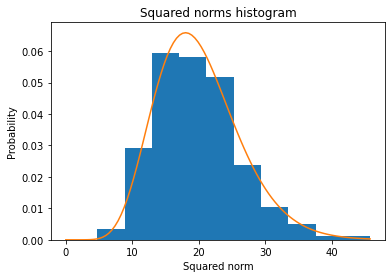

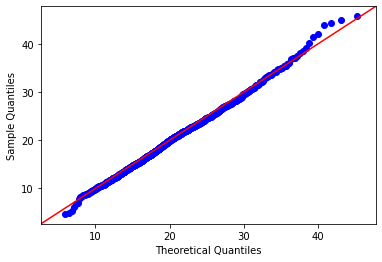

In [113]:
from scipy.stats import chi2
def error_residual_plot(sigma=0.7):
    n, p = 30, 10
    squared_norms = np.array([])
    for _ in range(1000):
        X, y, _ = generate_dataset(n, p, sigma=sigma)
        beta_hat = compute_least_squares_using_method3(X, y)
        squared_norms = np.append(squared_norms, np.linalg.norm(y - X@beta_hat)**2 / sigma**2)
    # Plot histogram and chi distribution
    plt.title("Squared norms histogram")
    plt.xlabel("Squared norm")
    plt.ylabel("Probability")
    hist = plt.hist(squared_norms, density=True)
    x_plot = np.linspace(0,np.max(squared_norms),100)
    plt.plot(x_plot, chi2.pdf(x_plot, df=n-p))
    plt.show()
    # Make pan pan au Q-Q
    sm.qqplot(squared_norms, dist=chi2(n-p), line='45')
    
    
error_residual_plot()

# The curve of the risk of the MLE in high dimension

1. Fix $n=200$, noise level $\sigma^2=0.7$, signal strength $2$, and a grid of values for $p/n$, say $0.1, 0.2, 0.3, 0.4, ..., 2.9, 3.0$. For each for of $n, p$, generate $10$ independent datasets and plot the boxplots corresponding the squared error $\|\hat\beta - \beta^*\|^2$ for each given ratio $p/n$. If $p>n$, make sure that $\hat\beta$ is the solution $(X^TX)^\dagger X^Ty$. Plot the corresponding theoretical curves for the expected squared error found using the formula for expected inverse Wishart matrices.

2. Bonus: Plot also the boxplots for the the bias and variance of the squared error. 

In [ ]:
# Question 1


# Question 2
raise NotImplementedError

NotImplementedError: 

Si $n>p$ :
$$
    E[\|{\hat{\beta} - \beta^*}\|^2] = \sigma^2 \frac{p}{n-p-1}
$$
Si $n<p-1$ :
$$
    E[\|{\hat{\beta} - \beta^*}\|^2] = \tau^2 (1 - \frac{n}{p}) + \sigma^2 \frac{n}{p-n-1}
$$